<a href="https://colab.research.google.com/github/Tha-Helena/Analise_fraude_cartoes_de_credito/blob/main/Projeto_03_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

<p align=center>
<img src="https://www.modalmais.com.br/wp-content/uploads/2020/02/fraude_cartoes.jpg" width="100%"></p>

Neste projeto, vamos abordar as fraudes em cartões de crédito que é uma área crítica para instituições financeiras e empresas de processamento de pagamentos em todo o mundo, incluindo o Brasil. Com o crescente uso de cartões de crédito e transações online, a segurança das informações dos clientes e a prevenção de atividades fraudulentas são de extrema importância.
De acordo com o relatório global da IBM, foi constatado que uma em cada três pessoas no Brasil já foi vítima de fraudes envolvendo cartões de crédito. Além do Brasil, outros importantes países também sofrem com essa prática, incluindo Singapura, Estados Unidos, China, Japão e Alemanha. Os cidadãos brasileiros tiveram perdas equivalentes a 2.978 decorrentes dessas práticas fraudulentas, o que corresponde aproximadamente a US$ 581.

O combate à fraude em cartões de crédito é uma prioridade. Pois a falta de detecção adequada pode acarretar em consideráveis prejuízos tanto para os consumidores quanto para as instituições financeiras. As Instituições financeiras e empresas de cartões de crédito brasileiras implementam sistemas sofisticados de detecção de fraude e segurança cibernética para proteger seus clientes.

Devido a esses motivos, o investimento em detecção de fraudes através de Inteligência Artificial tem crescido consideravelmente a cada ano, tornando-se uma promissora oportunidade para o campo de *Data Science*.

Ao utilizar grandes volumes de dados históricos como base, um algoritmo de *machine learning*, algoritmos de aprendizado de máquina onde são amplamente aplicados na detecção de fraudes em cartões de crédito. Eles são treinados com grandes conjuntos de dados históricos de transações legítimas e fraudulentas para aprender a identificar padrões e características que indicam atividades suspeitas. Ligeiramente mais eficiente do que os anteriores podem significar economias de milhões de Reais. Esse é o desafio que enfrentamos: aprimorar constantemente o uso de algoritmos, visando inibir ou evitar transações fraudulentas.

Com dedicação e inovação no campo de *Data Science*, buscamos desenvolver soluções cada vez mais eficazes para combater as fraudes em cartões de crédito, protegendo os clientes e fortalecendo a segurança do sistema financeiro como um todo. Através de estratégias inteligentes e tecnologias avançadas, podemos trabalhar para reduzir significativamente o impacto dessas atividades criminosas e proporcionar maior tranquilidade aos consumidores e empresas.


## Análise dos Dados

Vamos começar com um dicionário para facilitar o entendimento dos dados usados na análise

**Dicionário das variáveis**


* `Time` - Número de segundos decorridos entre esta transação e a primeira transação no conjunto de dados
* `V1-V28` - Usuários (os nomes foram descaracterizados para privacidade e segurança)
* `Amount` - Valor da transação
* `Class` - Classificação da transação (1 para transações fraudulentas, 0 para transações NÃO fraudulentas)
* `PCA` - (Principal Component Analysis), em português Análise de Componentes Principais, é uma técnica de análise multivariada usada para simplificar a complexidade dos dados, reduzindo o número de variáveis ​​originais enquanto preserva a maior parte de sua variabilidade.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (para privacidade e segurança dos envolvidos). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://www.melhorescartoes.com.br/wp-content/uploads/2022/12/golpes-cartao-credito-capa-01-1536x805.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

## Análise Exploratória dos Dados

Vamos importar os pacotes necessários e iniciar a Análise Exploratória.

In [1]:
# instalar a biblioteca scikit-plot
!pip install scikit-plot

In [3]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

Para facilitar a aquisição dos dados, vamos importar um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [4]:
# importar os dados para um dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(file_path)

# dimensões do conjunto original
print("Dimensões do Conjunto Original: ", df.shape)

# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# drop das linhas teste
df = df.drop(test.index)

# verificando o conjunto
print("Dimensões do conjunto de Teste: ", test.shape)
print("Dimensões do Conjunto de Treino:", df.shape)

Dimensões do Conjunto Original:  (284807, 31)
Dimensões do conjunto de Teste:  (42721, 31)
Dimensões do Conjunto de Treino: (242086, 31)


Após a importação dos dados para um *Dataframe*, sem a necessidade de ajustes adicionais nesta fase, torna-se possível iniciar uma análise exploratória dos dados, visando preparar um modelo de *Machine Learning*.

Ao examinar as cinco primeiras entradas, é possível chegar em algumas conclusões iniciais:

* As 5 primeiras entradas permitem entender como a transformação PCA deixou as *features* descaracterizadas (anônimas) e em valores numéricos. Para saber mais sobre PCA, [clique neste *link*](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf).

* As colunas `Time` e `Amount` foram preservadas, mantendo seu valor original.

* A variável alvo está representada na coluna `Class`, onde:
    * **0:** Transação normal
    * **1:** Transação fraudulenta

In [5]:
# Visualizando as 5 primeiras linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Visualizando as 5 últimas linhas
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Ao examinarmos o resumo estatístico, obtido através do método `describe()`, podemos confirmar que as variáveis relacionadas aos componentes principais (transformação PCA) não apresentam discrepâncias aparentes, bem como a coluna `Time`.

Na variável `Amount`, observamos que o valor médio das transações (considerando ambas as classes) é de 88.61, a mediana é igual a 22.00 e o desvio padrão é de 250.12. Embora o valor máximo atinja 19656.53, a maioria das transações financeiras consiste em quantias menores - conforme esperado.


In [7]:
# Visualizando o resulmo resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


Agora iremos identificar os tipos das colunas do dataset, a fim de garantir que estão na forma adequada para nossa análise. Para realizar essa tarefa, utilizaremos o método dtypes.

Tipos de entradas:

* *int* - números inteiros  que podem ser positivo ou negativo.
* *float* - "números quebrados" podem representar uma fração  

In [8]:
# Verificar tipos de variaveis
display(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Para identificar todas as informações disponíveis no *dataset*, vamos extrair o nome de todas as colunas. Dessa forma, teremos uma visão geral dos dados que possuímos.

In [9]:
# Extraindo os nomes das colunas
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Quanto à qualidade do *dataset*, é importante destacar que este não apresentou nenhum valor ausente, eliminando a necessidade de uma etapa de limpeza. Ao analisar a função abaixo, percebe-se que o maior valor por coluna para valores nulos é zero, o que confirma a ausência de valores faltantes.

In [10]:
# Verificando se há valores ausentes
df.isnull().sum().max()

0

De acordo com a [descrição dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), as entradas referentes a transações fraudulentas representam apenas 0,17% do total.

Essa discrepância fica claramente evidente no gráfico de barras, o que pode impactar o desempenho do modelo. Portanto, será essencial realizar um balanceamento dos dados antes de alimentar o modelo final de classificação. Isso garantirá que o modelo seja treinado de maneira imparcial e capaz de aprender com eficácia os padrões das transações fraudulentas, resultando em uma classificação mais precisa e confiável.

In [11]:
# configurar as cores que usarei no plot

AZUL = "#446491"
AZUL_ESCURO = "#2C415E"
AZUL_CLARO = "#7EA6DE"
CINZA = "#9EA9B7"

0    241668
1       418
Name: Class, dtype: int64

Fraudes representam0.1727% do dataset.



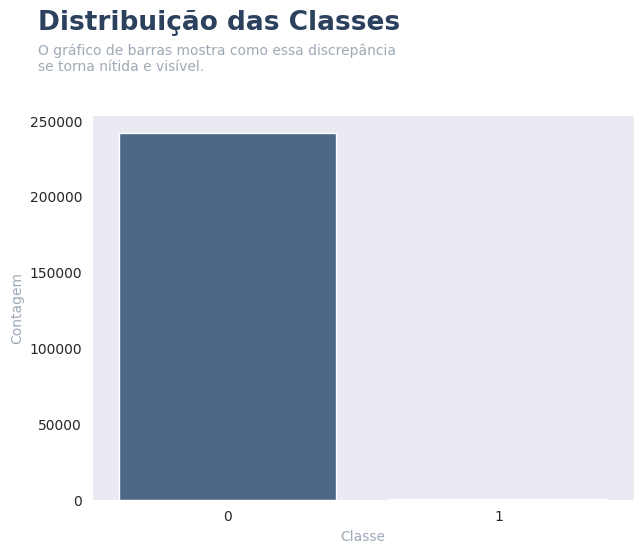

In [12]:
# Ver o balanceamento das classes
print(df.Class.value_counts())
print("\nFraudes representam{:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# Contagem das classes
class_counts = df['Class'].value_counts()

# Plotar gráfico de barras para as Classes
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Class', color=AZUL)
plt.xlabel('Classe', color=CINZA)
plt.ylabel('Contagem', color=CINZA)

# Configurando o título
plt.text(-0.7, 310000,'Distribuição das Classes', fontsize=19, color=AZUL_ESCURO, fontweight='bold')
plt.text(-0.7, 283000,'O gráfico de barras mostra como essa discrepância\nse torna nítida e visível.', fontsize=10, color=CINZA)

plt.show()

Dois gráficos foram plotados para comparar as distribuições das duas classes ao longo da dimensão do tempo (Time). No entanto, a partir das distribuições de frequência apresentadas abaixo, nenhuma informação significativa foi identificada.

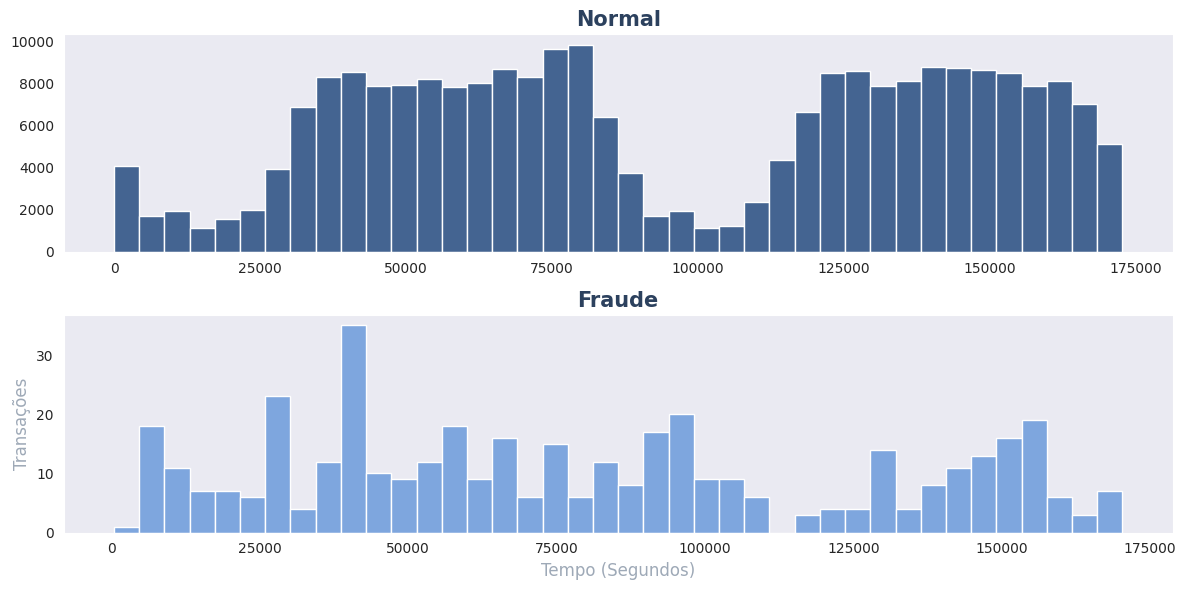

In [13]:
# Gáfico de variável
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color=AZUL)
ax[0].set_title('Normal', fontsize=15, color=AZUL_ESCURO, fontweight='bold')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color=AZUL_CLARO)
ax[1].set_title('Fraude', fontsize=15, color=AZUL_ESCURO, fontweight='bold')

plt.xlabel('Tempo (Segundos)', fontsize=12, color=CINZA)
plt.ylabel('Transações', fontsize=12, color=CINZA)

plt.tight_layout()


Após a análise exploratória, foram gerados *boxplots* para verificar se existem diferenças no padrão das transações em relação à dimensão `mount`.

De uma maneira geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de *machine learning*.

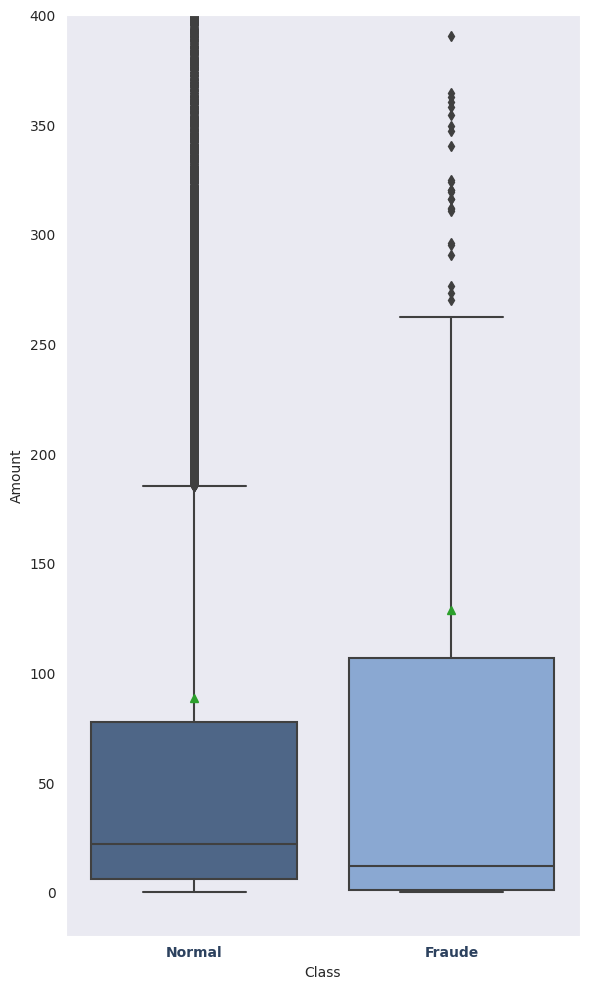

In [14]:
# Gráfico boxplot para a variável Amount
from seaborn.widgets import color_palette
fig, ax = plt.subplots(figsize=(6,10))

sns.boxplot(x=df['Class'], y=df['Amount'], showmeans=True, ax=ax, palette={0: AZUL, 1: AZUL_CLARO})
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'], color=AZUL_ESCURO, fontweight='bold')

plt.tight_layout()

As informações estatísticas para `df.Class == 1` mostram que a sua média exata está em 123.70 e a mediana em 11.40.

In [15]:
# Analisando as estatísticas da coluna Amount
df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()

count     417.000000
mean      123.706859
std       249.477727
min         0.000000
25%         1.000000
50%        11.400000
75%       106.550000
max      1809.680000
Name: Amount, dtype: float64

O gráfico de densidade é útil para compararmos as distribuições de cada variável em relação a cada classe e identificar aquelas que são mais relevantes na detecção de anomalias.

Nesse tipo de visualização procura-se as distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Veja como exemplo as variáveis `V3`, `V4`, `V10` e `V11`, como elas são bem distintas.

Por outro lado, variáveis como `V8`, `V13` e `V15` são muito similares, apresentando aproximadamente o mesmo comportamento.

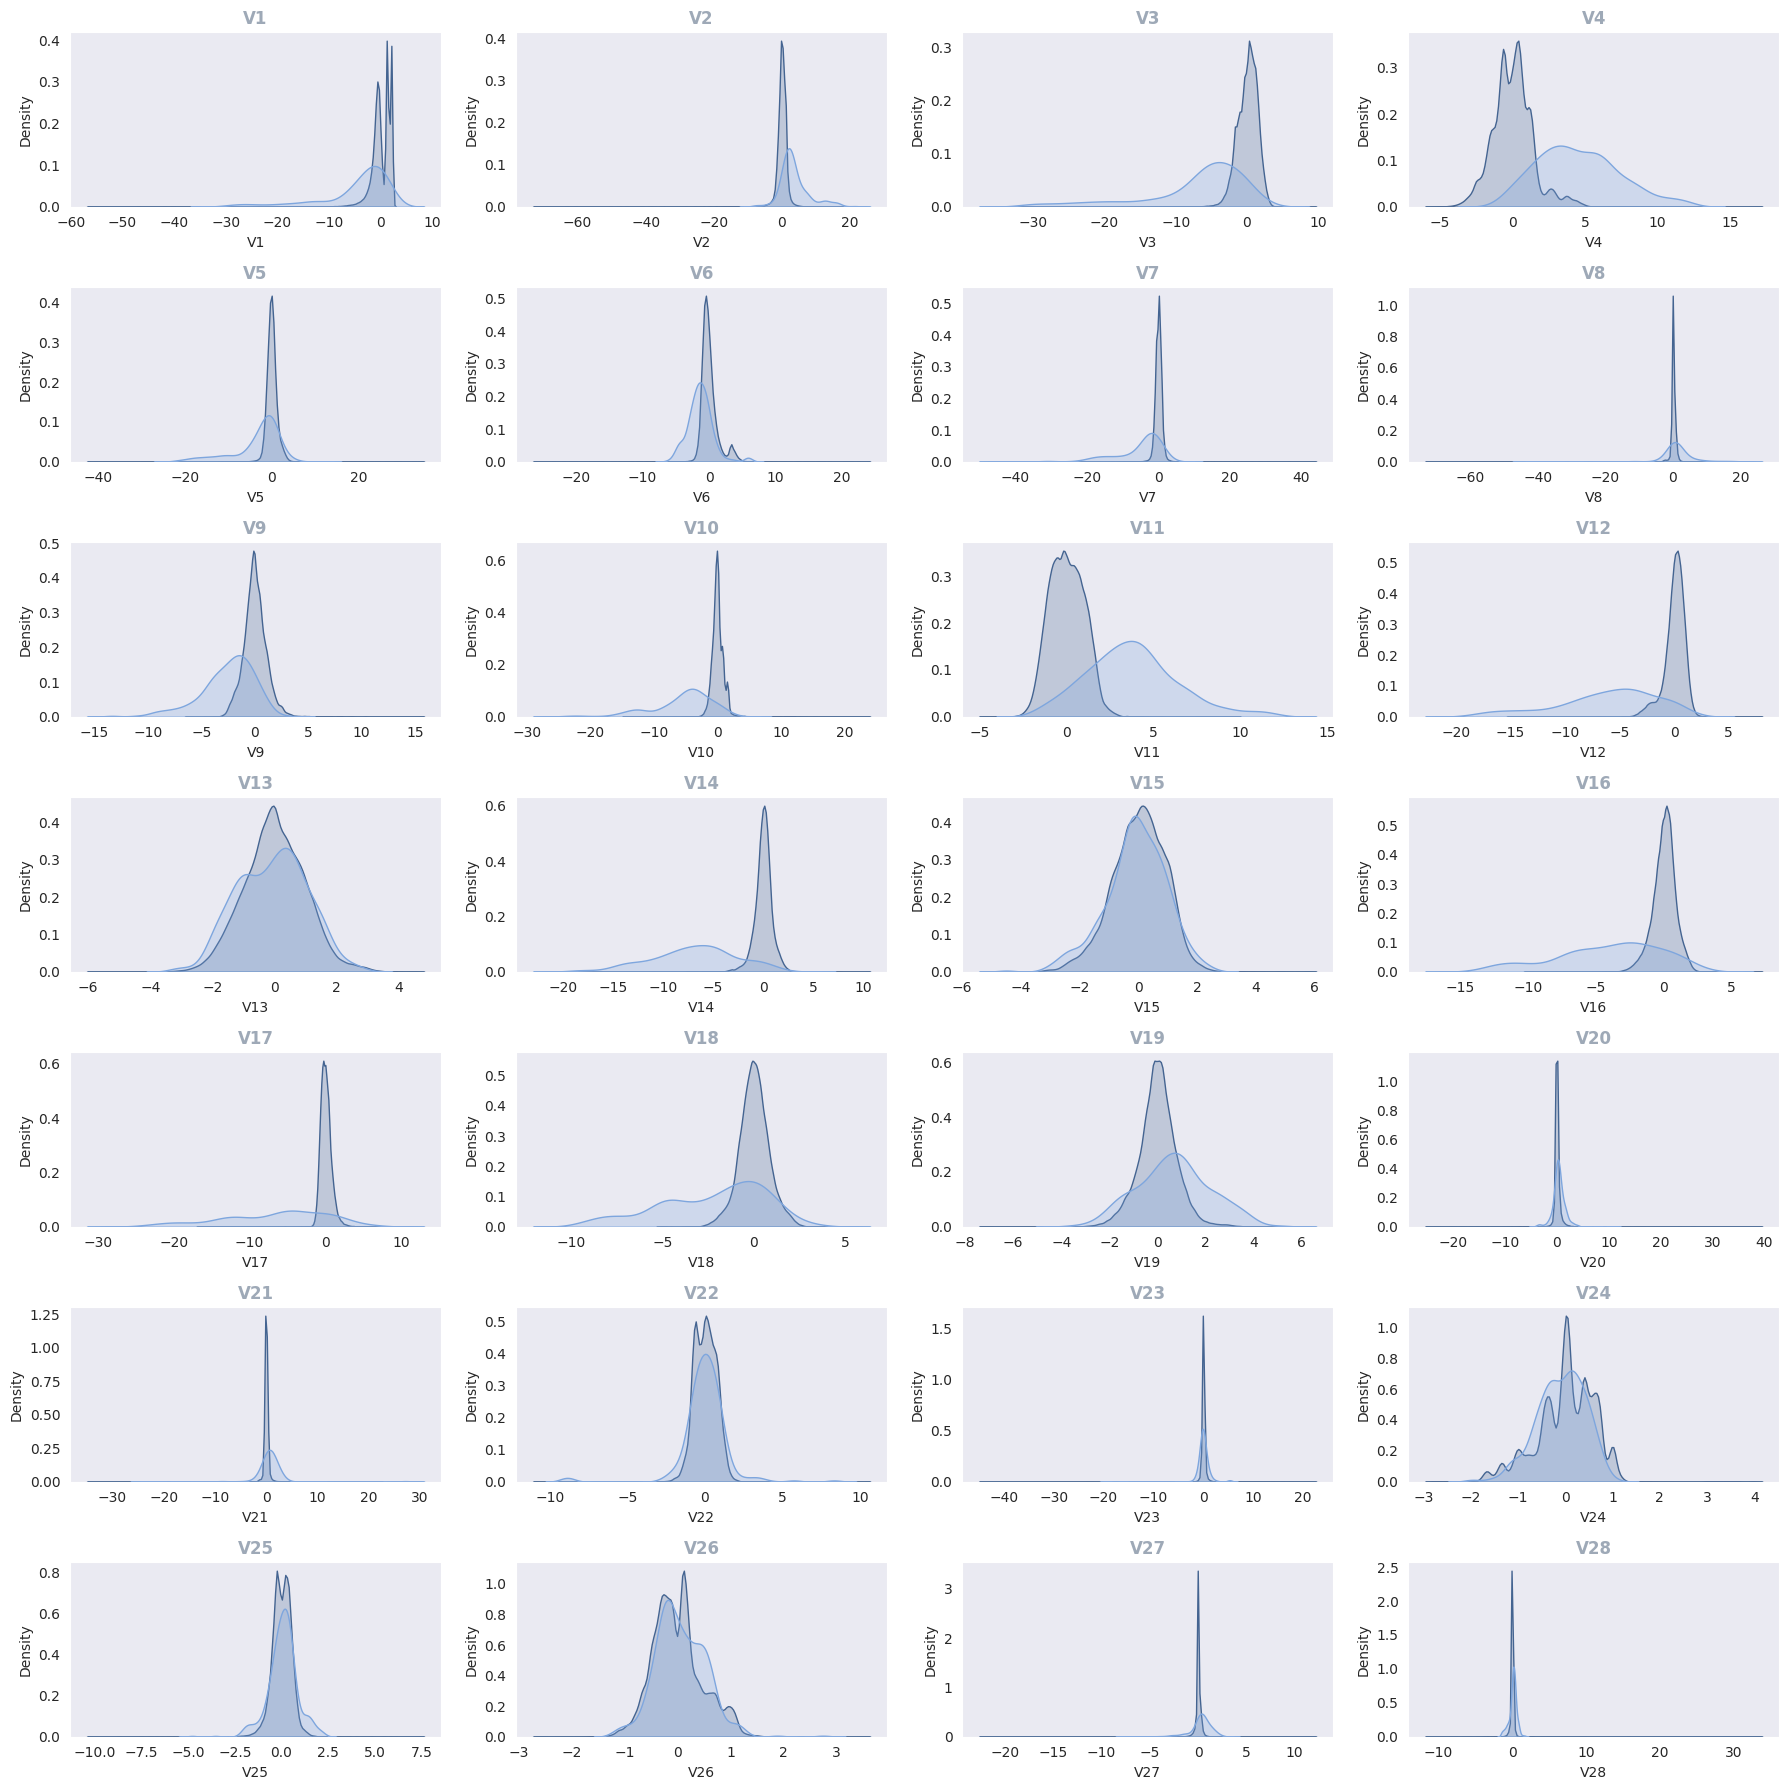

In [16]:
# Agora vamos plotar um gráfico de densidade é útil
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
  idx += 1
  plt.subplot(7, 4, idx)
  sns.kdeplot(df_class_0[col], label="Class 0", color=AZUL, shade=True)
  sns.kdeplot(df_class_1[col], label="Class 1", color=AZUL_CLARO, shade=True)
  plt.title(col, color=CINZA, fontsize=12, fontweight='bold')

plt.tight_layout()


Em resumo, algumas observações principais extraídas da etapa exploratória são as seguintes:

* O *dataset* apresenta um alto desbalanceamento, pois as transações fraudulentas correspondem a apenas 0,17% do total de entradas.
* Não foram identificados valores ausentes ou nulos no *dataframe*, indicando que os dados estão completos.
Considera-se que as características originais foram padronizadas, uma vez que a PCA é sensível à escala das variáveis.
* As colunas `Time` e `Amount` não estão normalizadas.

## Preparando os dados

Na etapa de preparação, ajustaremos os dados para que possam ser utilizados pelo modelo de Regressão Logística, iremos:

* Padronizar as características `Time` e `Amount`, que estão em outra ordem de grandeza.
* Dividir entre dados de treino e teste
* Balancear os dados a fim de evitar uma baixa performance para a classe 1 e *overfitting*.

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

**Padronizar `Time` e `Amount`**

Para esta etapa, uma vez que a coluna `Amount` possui *outliers* será usada a padronização por meio da classe `StandardScaler`.

In [17]:
# Padronizar as Colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# Ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


**Dividir entre conjuntos de Treino e Validação**

Antes de realizar o balanceamento dos dados, é necessário dividir (`split`) os dados existentes em conjuntos de Treino e Validação. Essa divisão é essencial para que possamos avaliar se o balanceamento foi adequado.

Para garantir que os conjuntos de Treino e Validação mantenham a mesma proporção de classes, utilizamos o parâmetro `stratify=True` durante a divisão dos dados. Dessa forma, garantimos que ambas as classes sejam representadas proporcionalmente em ambos os conjuntos, permitindo uma avaliação mais justa e confiável do modelo.

In [18]:
# Separar variávei entre x e y

x = df_clean.drop('Class', axis=1)
y = df['Class']

# Dividir o dataset entre treino e teste
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, shuffle=True)

**Balanceamento dos dados**

Usando a biblioteca `imblearn` é possível aplicar facilmente técnicas de balanceamento de dados. Neste projeto, optou-se por utilizar o *Under-sampling* para preservar a classe minoritária.

Com isso, observamos que a discrepância inicial entre as classes (gráfico de barras no início deste notebook) foi significativamente reduzida.

0    313
1    313
Name: Class, dtype: int64


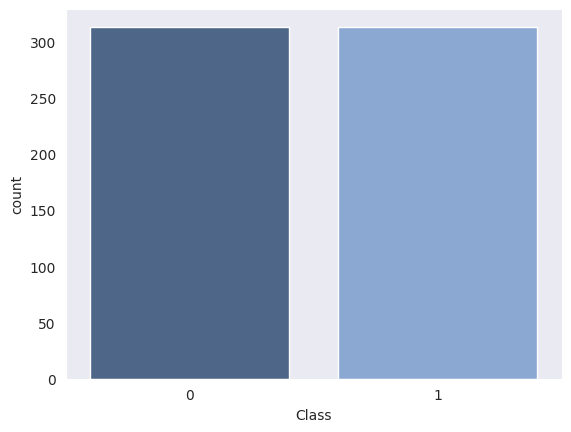

In [19]:
# Usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(x_train, y_train)

# Ver o balanceamento das classes
print(y_rus.value_counts())

# Plotar a nova distribuição de classes
sns.countplot(x=y_rus, palette={0: AZUL, 1: AZUL_CLARO});

Após o balanceamento dos dados, podemos analisar a matriz de correlação para identificar as variáveis que possuem uma relação mais forte entre si.

Anteriormente, sem o balanceamento dos dados, a matriz de correlação não apresentava informações relevantes. No entanto, após o balanceamento correto, a matriz passa a fornecer informações significativas sobre as variáveis.

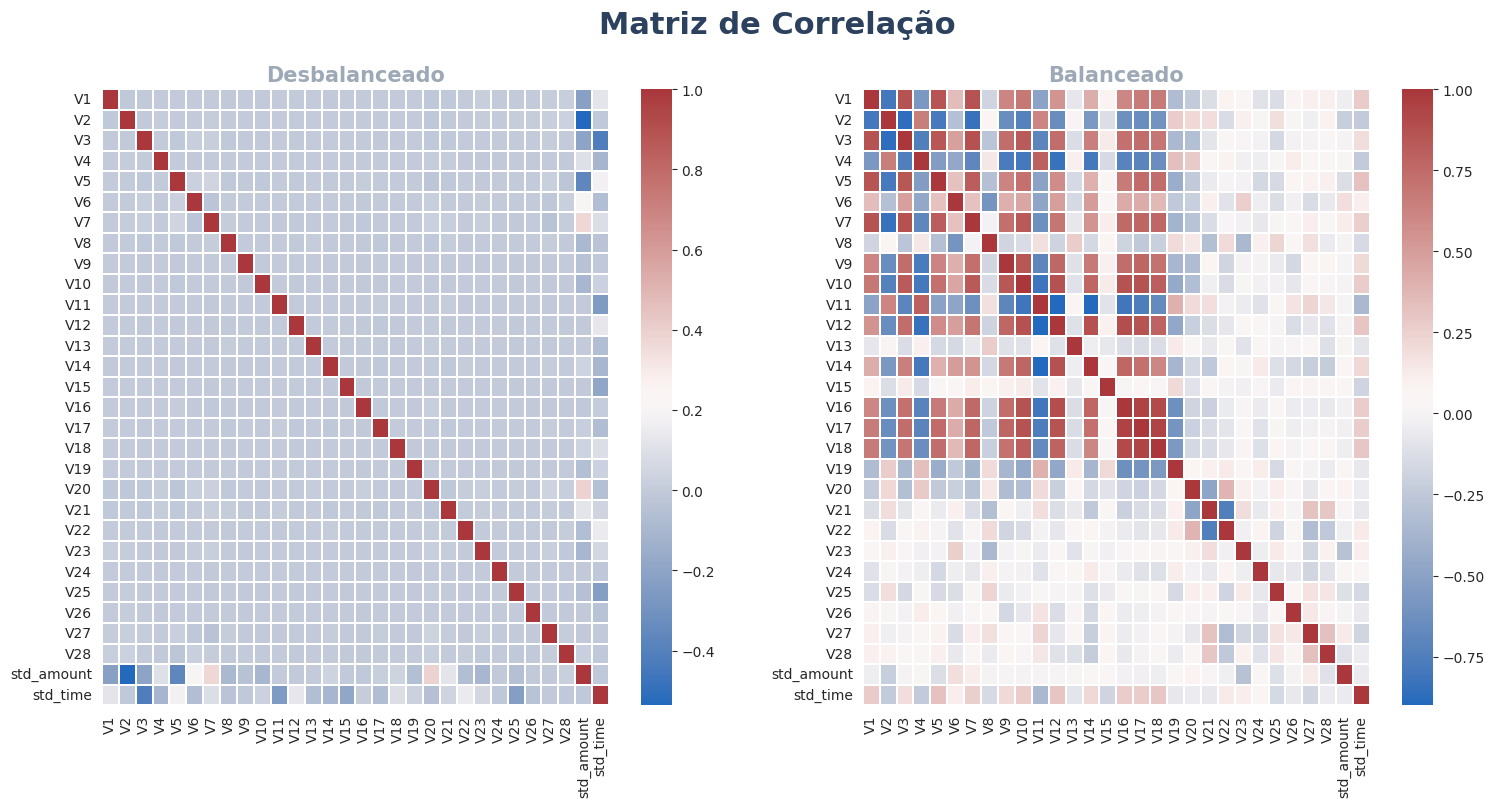

In [20]:
# Plotar a matriz de correlação
corr = x_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação', fontsize=22, color=AZUL_ESCURO, fontweight='bold')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="vlag", ax=ax[0])
ax[0].set_title('Desbalanceado', fontsize=15, color=CINZA, fontweight='bold')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="vlag", ax=ax[1])
ax[1].set_title('Balanceado', fontsize=15, color=CINZA, fontweight='bold')


plt.show()

## Modelo de Machine Learning

Com todos os dados preparados e após uma análise exploratória completa, irei construir um classificador usando a Regressão Logística.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`. Na sequência, serão realizadas as previsões sobre os dados de teste.

In [21]:
# Instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# Fazer as previsões em cima dos dados de teste
y_pred = model.predict(x_val)
y_proba = model.predict_proba(x_val)

Após treinar o modelo e realizar as previsões, é importante avaliar seu desempenho de maneira adequada.

Neste tipo de problema, a acurácia não é uma métrica adequada, conforme explicado [no artigo](http://sigmoidal.ai/como-lidar-com-dados-desbalanceados/). Uma alta acurácia, como 99,88%, pode levar a uma detecção de fraudes inferior a 60%.

Para avaliar a taxa de acertos em transações fraudulentas, é recomendado observar a matriz de confusão ou a coluna *recall* do Relatório de Classificação.

Outra métrica relevante para avaliar a eficácia é a [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772), que indica a área sob a curva. Neste modelo de Regressão Logística, obtemos uma AUC de 96%. Essa métrica fornece uma medida da capacidade do modelo em distinguir entre as classes, sendo uma referência importante para a avaliação do seu desempenho.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9690    0.9842     60417
           1     0.0478    0.8952    0.0908       105

    accuracy                         0.9689     60522
   macro avg     0.5238    0.9321    0.5375     60522
weighted avg     0.9982    0.9689    0.9826     60522

Acurácia: 0.9689

AUC: 0.9321



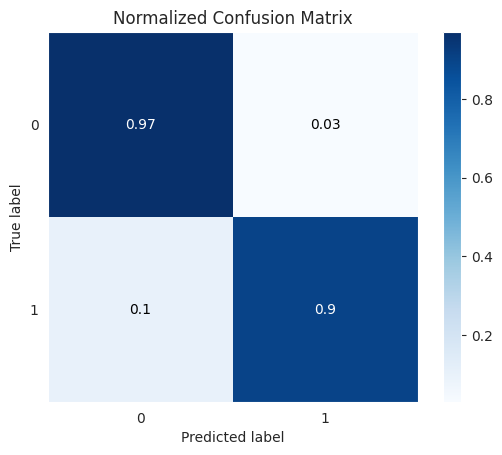

In [22]:
# Plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# Imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# Imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

## Realizando Previsões no Conjunto de Teste

Ao longo do projeto, realizamos a divisão dos dados em três conjuntos distintos: o conjunto de treino, o conjunto de validação e o conjunto de teste.

Agora que já exploramos e prepararmos os dados, treinamos o modelo e realizamos previsões no conjunto de validação, chegou o momento de avaliar o potencial desse modelo ao utilizar o conjunto de teste.

Nesta etapa, utilizaremos o modelo que foi treinado com o novo conjunto de dados. Entretanto, para garantir resultados justos e consistentes, é fundamental que os novos dados estejam nas mesmas condições daqueles utilizados para treinar o modelo.

Nesse contexto, é necessário padronizar as colunas `Time` e `Amount`. Apesar de não podermos balancear os dados para evitar perda de informações, o nosso modelo deve ser capaz de realizar previsões em todas as linhas que receber, garantindo a sua efetividade e robustez na avaliação do conjunto de teste.

In [23]:
# Padronizar as colunas Time e Amount - Teste
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1,1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1,1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# Ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Agora vamos separar entre X e Y, e fazer nossas previsões.

In [24]:
# Separar variáveis entre X e y
x_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

In [25]:
# Fazer as previsões em cima dos dados de teste
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)

 Com as previsões concluídas, vamos visualizar os resultados obtidos. Através das análises visuais, podemos compreender melhor o desempenho do modelo e avaliar sua eficácia em relação aos dados de teste.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9685    0.9839     42647
           1     0.0488    0.9324    0.0927        74

    accuracy                         0.9684     42721
   macro avg     0.5243    0.9504    0.5383     42721
weighted avg     0.9982    0.9684    0.9824     42721

Acurácia 0.9684

AUC: 0.9504



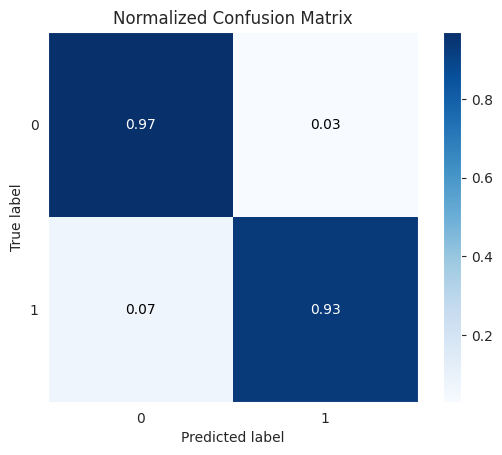

In [26]:
# Plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# Imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# Imprimir a acurária do modelo
print("Acurácia {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Podemos ver que nossos resultados foram marginalmente inferiores ao do conjunto de validação, o que é um excelente resultado!

## Conclusões

Como pode ser observado, esse não é um problema trivial. Embora os dados estejam bem tratados e sem valores ausentes ou variáveis categóricas, o desbalanceamento e a Transformação PCA demandaram um trabalho considerável.

Apesar do bom resultado final, ainda há oportunidade para testar o desempenho com outros algoritmos de classificação e otimizar seus parâmetros.

Em resumo, a detecção de fraudes em cartões de crédito é um processo contínuo e complexo que requer o uso de tecnologias avançadas e a colaboração entre instituições financeiras para garantir a segurança das transações e proteger os clientes contra atividades fraudulentas. A constante evolução e aprimoramento são fundamentais para enfrentar esse desafio em constante mudança.